# Implement 8 Puzzle Problem using A* Algorithm

# Logic 

 Given a 3×3 board with 8 tiles and one empty space<br>
   --We first move the empty space in all the possible directions in the start state and calculate the f-score for each state.This is called expanding the current state.<br>
   --After expanding the current state, it is pushed into the closed list and the newly generated states are pushed into the open list<br>
   --A state with the least f-score is selected and expanded again<br>
   --This process continues until the goal state occurs as the current state.<br>
   --Basically, here we are providing the algorithm a measure to choose its actions. The algorithm chooses the best possible action and proceeds in that path<br>
   --This solves the issue of generating redundant child states, as the algorithm will expand the node with the least f-score.<br>


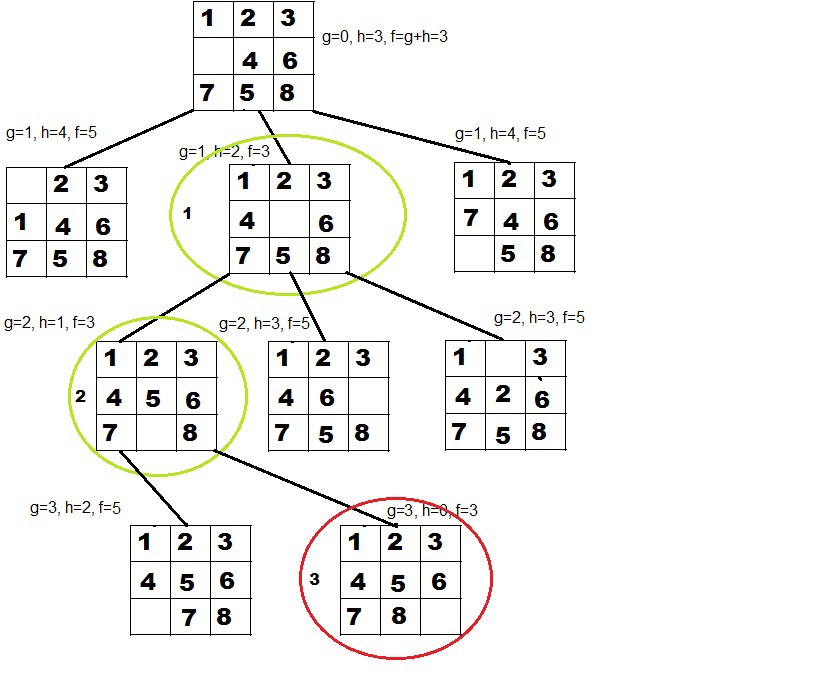

## Code

In [1]:

class Node:
    def __init__(self, data, level, fval):
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        x, y = self.find(self.data, '_')
        val_list = [[x, y - 1], [x, y + 1], [x - 1, y], [x + 1, y]]
        children = []
        for i in val_list:
            child = self.move(self.data, x, y, i[0], i[1])
            if child is not None:
                child_node = Node(child, self.level + 1, 0)
                children.append(child_node)
        return children

    def move(self, puz, x1, y1, x2, y2):
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None

    def copy(self, root):
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp

    def find(self, puz, x):
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data)):
                if puz[i][j] == x:
                    return i, j

In [2]:

class Puzzle:
    def __init__(self, size):
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        puz = []
        for i in range(0, self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self, start, goal):
        return self.h(start.data, goal) + start.level

    def h(self, start, goal):
        """Manhattan Distance"""
        cost = 0
        goal = Node(goal, 0, 0)
        for i in range(0, self.n):
            for j in range(0, self.n):
                I, J = goal.find(goal.data, start[i][j])
                cost += abs(i - I) + abs(j - J)

        return cost

    def process(self):
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")
        goal = self.accept()

        start = Node(start, 0, 0)
        start.fval = self.f(start, goal)
        self.open.append(start)
        print("\n\n")
        while True:
            cur = self.open[0]
            print("")
            print("  | ")
            print("  | ")
            print(" \\\'/ \n")
            for i in cur.data:
                for j in i:
                    print(j, end=" ")
                print("")
            if self.h(cur.data, goal) == 0:
                break
            for i in cur.generate_child():
                i.fval = self.f(i, goal)
                self.open.append(i)
            self.closed.append(cur)
            del self.open[0]

            self.open.sort(key=lambda x: x.fval, reverse=False)

In [5]:
#Test-Case 1
puz = Puzzle(3)
puz.process()

Enter the start state matrix 



 1 2 3
 _ 4 6
 7 5 8


Enter the goal state matrix 



 1 2 3
 4 5 6
 7 8 _






  | 
  | 
 \'/ 

1 2 3 
_ 4 6 
7 5 8 

  | 
  | 
 \'/ 

1 2 3 
4 _ 6 
7 5 8 

  | 
  | 
 \'/ 

1 2 3 
4 5 6 
7 _ 8 

  | 
  | 
 \'/ 

1 2 3 
4 5 6 
7 8 _ 
